<a href="https://colab.research.google.com/github/k3nidhi/Datascience/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD THE DATASET

In [2]:
import pandas as pd

data_url = 'https://archive.ics.uci.edu/static/public/222/data.csv'
df = pd.read_csv(data_url)


EXPLORE THE DATA
-> CHECK FOR MISSING VALUES AND DATATYPES

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age                0
job              288
marital       

**DATA PREPROCESSING**  **ENCODING CATEGORICAL VALUES**

In [4]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome', 'month'], drop_first=True)


**SPLIT THE DATA**

In [11]:
from sklearn.model_selection import train_test_split

y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the target column from the feature set
X = df.drop('y', axis=1)

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**BUILD THE DECISION TREE MODEL**

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

**EVALUATE THE MODEL**

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9003243880861103
Confusion Matrix:
 [[11641   325]
 [ 1027   571]]
F1 Score: 0.4578989574979952


**HYPERPARAMETER TUNING**  -> Perform Grid Search or Random Search to find optimal parameters for max_depth, min_samples_split, etc.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5}


DECISION TREE STRUCTURE

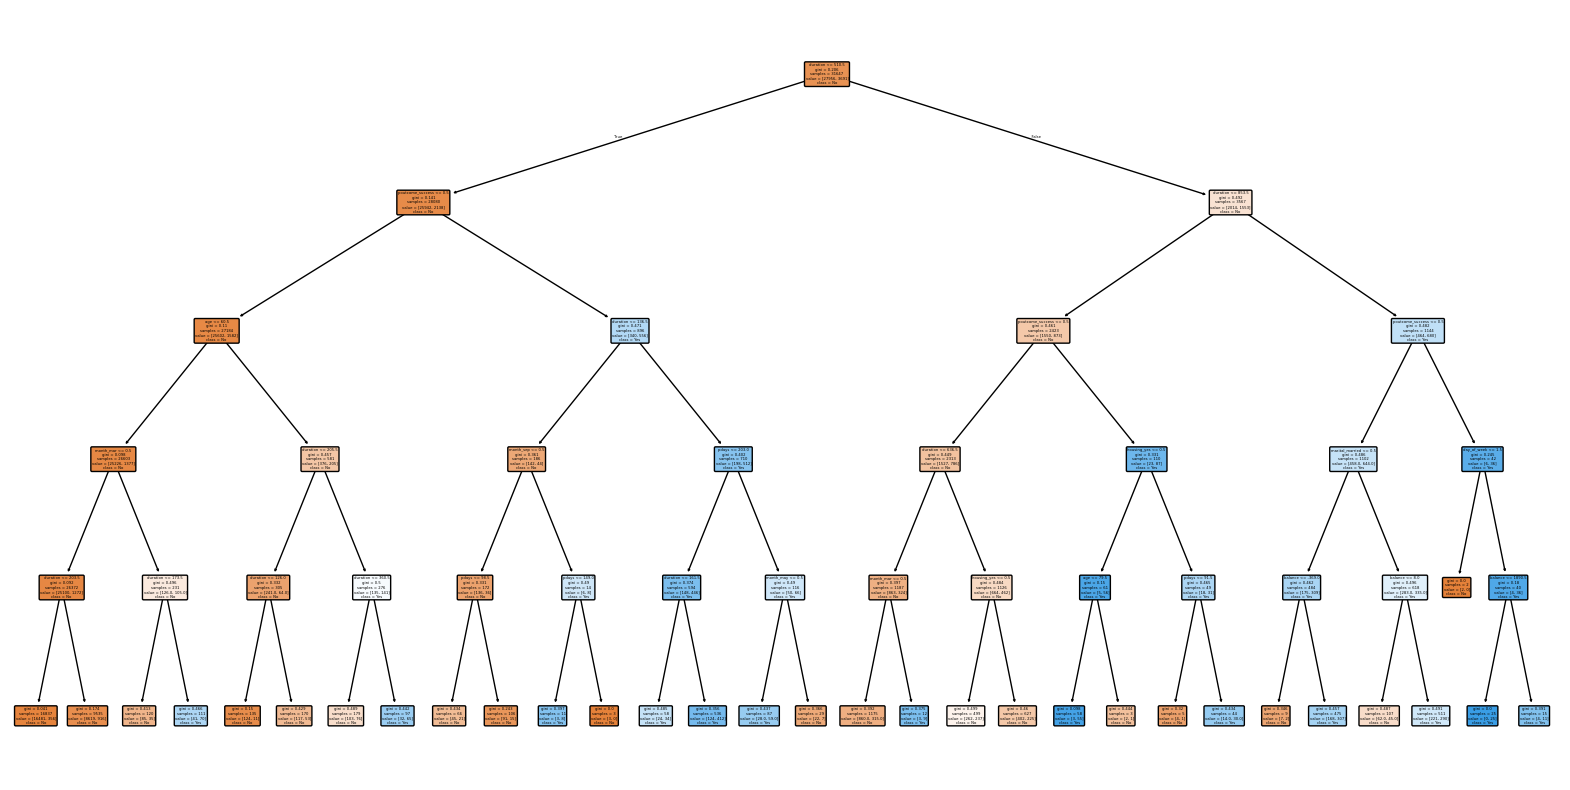

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()


FEATURE IMPORTANCE PLOT

<ipython-input-10-585683a34da4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


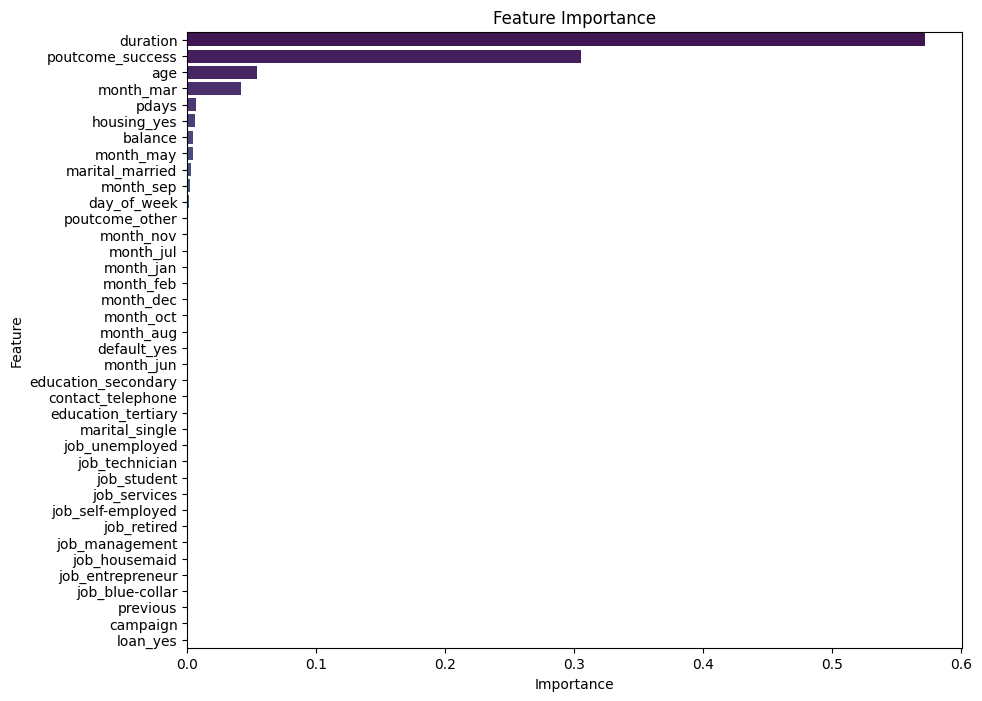

In [10]:
import pandas as pd
import seaborn as sns

# Get feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()
